<a href="https://colab.research.google.com/github/LorenaAmaya/Talento-Tech/blob/main/Practica_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUTORIAL LIMPIEZA DE DATOS CON PYTHON Y PANDAS
1. EL PROBLEMA DEL NEGOCIO
Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefonicamente a posibles clientes para determinar si estan interesados o no en adquirir un certificado de deposito a termino con el banco.
¿que perfil tienen los clientes con mayor potencial de conversion?

2. EL SET DE DATOS
La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")





3. UNA PRIMERA MIRADA AL DATASET


In [42]:
# Impotar librerias
import pandas as pd
import matplotlib.pyplot as pit
import seaborn as sns

In [43]:
# Lectura
from google.colab import drive
drive.mount('/content/drive')

ruta = '''/content/drive/MyDrive/TALENTO TECH/Copia de dataset_banco.csv'''
data = pd.read_csv(ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [45]:
# Veamos las variables categoricas y las numericas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


4. LIMPIEZA

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.


4.1 DATOS FALTANTES

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:


In [46]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


##4.2 COLUMNAS IRRELEVANTAS

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:



In [47]:
# Conteo de los niveles en las diferentes columnas categoricas
cols_cat = ['job', 'marital', 'education', 'default', 'housing',
        'loan', 'contact', 'month', 'poutcome', 'y']

for col in cols_cat:
        print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna job: 18 subniveles
Columna marital: 6 subniveles
Columna education: 10 subniveles
Columna default: 2 subniveles
Columna housing: 2 subniveles
Columna loan: 6 subniveles
Columna contact: 5 subniveles
Columna month: 12 subniveles
Columna poutcome: 6 subniveles
Columna y: 2 subniveles


Todas las columnas categoricas tienen mas de 1 subniver. No eliminaremos ninguna.

Verifique lo que ocurre con las columnas numericas:

In [48]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Todas las columnas numericas tienen desviaciones estandar (''std'') diferentes de cero, loque indica que no tienen un unico valor. preservaremos todas las columnas numericas

La desviacion estandar es una medida que nos indica que tan dispersos o alejados estan los valores de un conjunto de datos respecto a su media o promedio.

Imagina que tienes un conjunto de datos que representa las alturs de los estudiantes en una clase. Si la desviacion estandar es baja, significa que la mayoria de los estudiantes tienen alturas muy similares entre si y cercanas a la altura promedio de la clase. Por otro lado, si la desviacion estandar es muy alta, significa que las alturas de los estudiantes estan muy dispersas, algunos son muy altos y otros muy bajos en comparacion con la altura promedio.

Entonces, la desviacion estandar nos da una idea de la dispersion o variabilidad de los datos alrededor de su promedio. Una desviacion estandar baja indica que los datos estan mas agrupados alrededor del promedio, mientras que una desviacion estandar alta indica que los datos estan mas dispersos o separados del promedio

In [49]:
#conteo de valores con -1
count = data ['pdays'].value_counts()[-1]
print(count)

36953


In [50]:
# Calcula la media del atributo ''pdays: dias de contacto antes de la campaña actual''
media = data['pdays'].mean()

print ('Promedio de dias de contacto:', media)

Promedio de dias de contacto: 40.17822461123277


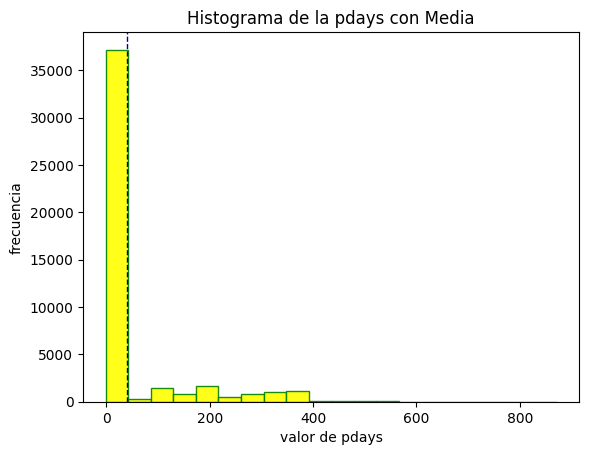

In [51]:
#graficar un histograma del atributo 'pdays'
pit.hist(data['pdays'], bins=20, color='yellow', edgecolor='green', alpha=0.9)

#agregar una linea vertical para mostrar la media
pit.axvline(media, color='darkblue', linestyle='dashed', linewidth=1)

#Etiqueta y titulo
pit.xlabel('valor de pdays')
pit.ylabel('frecuencia')
pit.title('Histograma de la pdays con Media')

#Mostrar la grafica
pit.show()

In [52]:
# Calcula la desviacion estandar del atributo ''pdays''
desviacion_estandar = data['pdays'].std()
print('Desviacion estandar de la pdays:', desviacion_estandar)

Desviacion estandar de la pdays: 100.10328306134589


Text(0.5, 1.0, 'Histograma de la pdays con Desviacion Estandar')

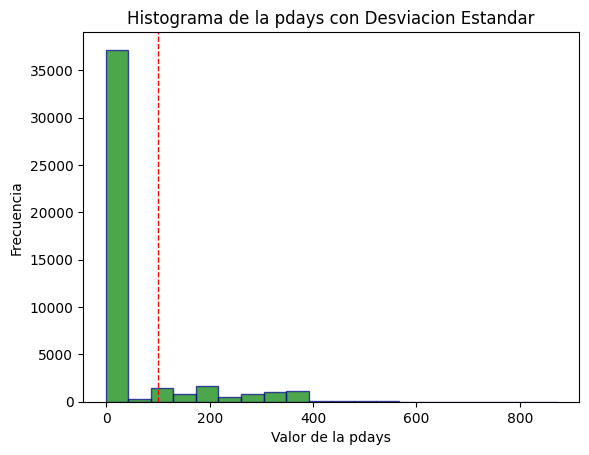

In [53]:
# Graficar un histograma de pdays con Desviacion Estandar
pit.hist(data['pdays'], bins=20, color= 'green', edgecolor='darkblue', alpha=0.7)

#Agregar una linea vertical para mostrar la desviacion estandar
#pit.axvline(data['pdays'].std(), color='red', linestyle='dashed', linewidth=2)
pit.axvline(desviacion_estandar, color='red', linestyle='dashed', linewidth=1)

#Etiquetas y titulo
pit.xlabel('Valor de la pdays')
pit.ylabel('Frecuencia')
pit.title('Histograma de la pdays con Desviacion Estandar')

#Mostrar la grafica

In [54]:
# Calcular la media del atributo ''campaña''
media= data['campaign'].mean()
print('promedio de atributo campaing:', media)

promedio de atributo campaing: 2.7637312805538965


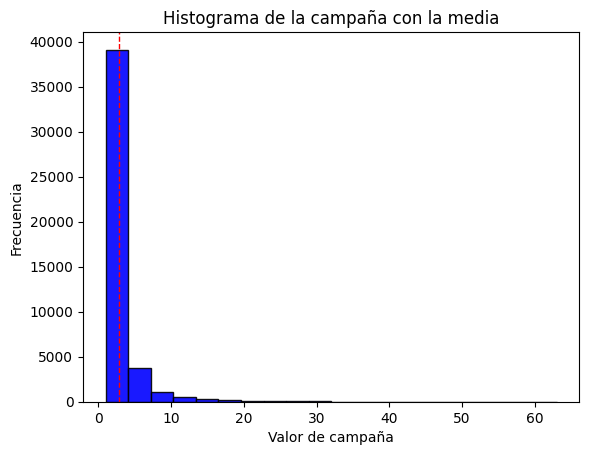

In [55]:
# Graficar un histograma del atributo ''campaña''
pit.hist(data['campaign'], bins=20, color='blue', edgecolor='black', alpha=0.9)

#Agregar una linea vertical de la media
pit.axvline(media, color='red', linestyle='dashed', linewidth=1)

#Etiquetas y titulo
pit.xlabel('Valor de campaña')
pit.ylabel('Frecuencia')
pit.title('Histograma de la campaña con la media')

#Mostrar la grafica
pit.show()

4.3 Filas repetidas

In [56]:
print(f'tamaño del set antes de eliminar filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'tamaño del set despues de eliminar las filas repetidas: {data.shape}')

tamaño del set antes de eliminar filas repetidas: (45207, 17)
tamaño del set despues de eliminar las filas repetidas: (45203, 17)


4.4 *Outliers* en las variales numericas
No siempre se deben eliminar los *outliers* porque depediendo de la variable numerica analizada estos pueden contener informacion importante.
Creemos graficas tipo ''boxplot'' de las columnas numericas:

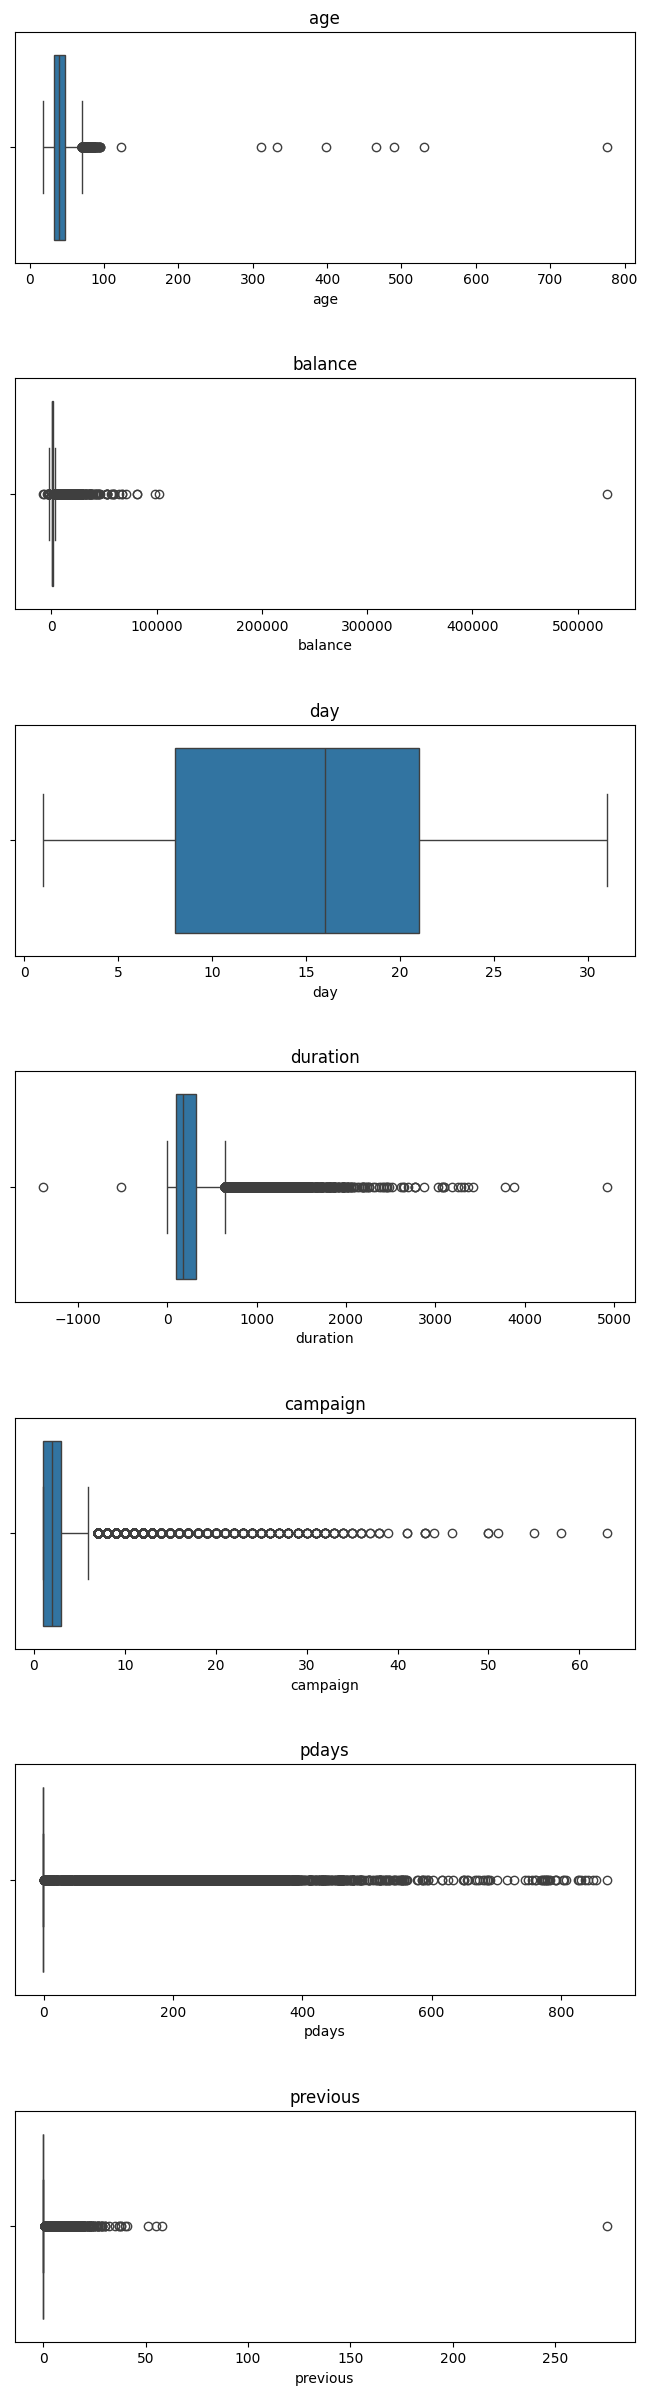

In [57]:
#Generar graficos individuales pues las variables numericas estan en rangos
#direfente

cols_num =['age', 'balance', 'day', 'duration', 'campaign',
           'pdays', 'previous']

fig, ax = pit.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

#for i, col in enumerate(cols_num):
 #   sns.boxplot(x=col, data=data, ax=ax[i])
 #   ax[i].set_title(col)
for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

OBSERVACIONES
- ''AGE'': Hay sujetos con edades mucho mayores a 100 años
- ''DURATION'': Hay valores negativos
- ''PREVIOUS'':Hay un valor extremadamente alto (cercano a 300)

In [60]:
#ELIMINAR FILAS CON ''AGE''>100
print(f'Tamaño del set antes de eliminar registros de edad:{data.shape}')
data= data.drop(data[data['age'] > 100].index)
print(f'Tamaño del set despues de eliminar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad:(45203, 17)
Tamaño del set despues de eliminar registros de edad: (45195, 17)


In [61]:
#ELIMINAR FILAS CON ''DURATION''<0
print(f'Tamaño del set antes de eliminar registros de edad:{data.shape}')
data = data.drop(data[data['duration'] < 0].index)
print(f'Tamaño del set despues de eliminar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad:(45195, 17)
Tamaño del set despues de eliminar registros de edad: (45193, 17)
